# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

The task involves applying data analysis to identify significant factors influencing the pricing of used cars. 
Using a dataset comprising information on 426,000 cars, the goal is to conduct exploratory data analysis (EDA) and regression modeling to uncover correlations between various car attributes (such as mileage, age, brand, model, etc.) and their respective prices. 
The outcome of this analysis will provide actionable insights to the client, a used car dealership, regarding the features that consumers value most in determining the prices of used cars.

#### Preliminary Plan

Step 1: Initially, we will conduct thorough data exploration to gain a comprehensive understanding of the dataset. This phase aims to uncover underlying trends and patterns that can guide our subsequent modeling efforts.

Step 2: Following data exploration, we will undertake data cleaning and potentially employ feature engineering techniques to enhance the quality and relevance of our dataset for modeling purposes.

Step 3: Using the refined dataset, our next objective is to employ various regression techniques—such as linear regression, polynomial regression, and feature importance analysis—to predict used car prices. To optimize model performance and robustness, we will utilize cross-validation, grid-search for hyperparameter tuning, sequential feature selection methods, and consider regularization techniques like ridge regression.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.inspection import permutation_importance
from sklearn.compose import make_column_transformer, TransformedTargetRegressor, ColumnTransformer
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso, ARDRegression, BayesianRidge
from sklearn.kernel_ridge import KernelRidge 
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, mean_absolute_percentage_error
import io

In [2]:
# Import Data
df = pd.read_csv('data/vehicles.csv')

In [3]:
# Preview of the data in hand
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [4]:
# Number of observation and data type for each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [5]:
# number of unique answers for each feature
unique = df.nunique(axis = 0)
unique

id              426880
region             404
price            15655
year               114
manufacturer        42
model            29649
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118246
drive                3
size                 4
type                13
paint_color         12
state               51
dtype: int64

In [6]:
# Description of the number data types
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


### Identify Data Quality & Problems

In [7]:
df.isna().sum()/df.shape[0]*100

id               0.000000
region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
VIN             37.725356
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
state            0.000000
dtype: float64


These columns have notable percentages of missing data, which may require special attention during data preprocessing and analysis phases to handle appropriately :
size: 71.8% missing values.
cylinders: 41.6% missing values.
condition: 40.8% missing values.
VIN: 37.7% missing values.
drive: 30.6% missing values.
paint_color: 30.5% missing values.
type: 21.8% missing values.
year: 28.2% missing values.


In [8]:
#Explore the object features
df_ = df.select_dtypes(exclude=['int', 'float'])
for col in df_.columns:
    print('\n-----------\n')
    print(df_[col].nunique())
    print(df_[col].unique()) # to print categories name only
    print(df_[col].value_counts()) # to print count of every category


-----------

404
['prescott' 'fayetteville' 'florida keys' 'worcester / central MA'
 'greensboro' 'hudson valley' 'medford-ashland' 'erie' 'el paso'
 'bellingham' 'skagit / island / SJI' 'la crosse' 'auburn' 'birmingham'
 'dothan' 'florence / muscle shoals' 'gadsden-anniston'
 'huntsville / decatur' 'mobile' 'montgomery' 'tuscaloosa'
 'anchorage / mat-su' 'fairbanks' 'kenai peninsula' 'southeast alaska'
 'flagstaff / sedona' 'mohave county' 'phoenix' 'show low' 'sierra vista'
 'tucson' 'yuma' 'fort smith' 'jonesboro' 'little rock' 'texarkana'
 'bakersfield' 'chico' 'fresno / madera' 'gold country' 'hanford-corcoran'
 'humboldt county' 'imperial county' 'inland empire' 'los angeles'
 'mendocino county' 'merced' 'modesto' 'monterey bay' 'orange county'
 'palm springs' 'redding' 'reno / tahoe' 'sacramento' 'san diego'
 'san luis obispo' 'santa barbara' 'santa maria' 'SF bay area'
 'siskiyou county' 'stockton' 'susanville' 'ventura county'
 'visalia-tulare' 'yuba-sutter' 'boulder' 'colora

In [9]:
#Create a random_sampling function to observe samples of the model feature
def random_sampling(df, n):
    random_sample = np.random.choice(df,replace = False, size = n)
    return(random_sample)
RandomSample = random_sampling(df['model'], 100)
RandomSample

array(['sierra 1500', 'beetle 1.8t s', '3', 'optima', '300',
       'f150 lariat 4x4 1/2 ton gas', 'challenger', 'silverado 1500',
       'jetta', 'focus', 'cherokee', 'trailblazer ls', 'civic vp', '2500',
       'focus', 'hummer h3', 'f-150', 'leaf', 'mustang premium rwd gas',
       'f-150', 'camry', 'sierra 2500hd', 'super duty f-550 drw', '1500',
       'mustang', 'traverse lt', 'express cargo van',
       'FREIGHTLINER CASCADIA', 'wrangler sport', 'edge', 'altima',
       'f150', 'regal', 'wrangler', 'f150 lariat supercrew 4x4', 'murano',
       'countryman', 'torino gt', 'wrangler unlimited', '1500',
       'sierra 2500 hd extended cab', 'Scion iM Hatchback 4D', 's10 ls',
       'highlander', 'legacy 2.5i premium', 'silverado 1500', '1500',
       '1 ton', 'f350 super duty lariat', 'f150 xlt 4wd',
       'ranger supercrew xl pickup', 'tacoma', 'civic sdn', 'expedition',
       nan, '1999', 'es 350', 'avalon', 'sorento', 'crv', 'a5',
       'f150 super cab xl pickup 4d', 'f-150', 

From the random sample of car models extracted from the dataset, several observations and inferences can be made:

1. **Variety of Brands and Models**: The sample includes a diverse range of vehicle makes and models, such as Chevrolet Silverado, Ford F-150, Toyota Tacoma, Honda Accord, and Nissan Altima, among others. This indicates that the dataset covers a broad spectrum of vehicles from various manufacturers.

2. **Popular Models**: Certain models appear multiple times in the sample, suggesting they are popular or commonly listed in the dataset. For example, Ford F-150 and Chevrolet Silverado are well-represented, which aligns with their status as popular pickup trucks in the U.S.

3. **Diverse Vehicle Types**: The sample includes a mix of vehicle types, including sedans (Honda Accord), trucks (Chevrolet Silverado, Ford F-150), SUVs (Ford Explorer, Jeep Wrangler), and hybrids (Toyota Prius). This diversity reflects the broad market coverage of the dataset in terms of vehicle types.

4. **Spelling and Typographical Errors**: There are instances of potential spelling or typographical errors in model names, such as "nissian altima" instead of "Nissan Altima". This suggests that data cleaning may be necessary to standardize model names for analysis.

5. **Incomplete Data**: There are entries where the model name is missing (NaN values), indicating incomplete data entries that need to be handled appropriately during data preprocessing.

6. **Luxury and Specialized Vehicles**: There are mentions of luxury vehicles like "Maserati Quattroporte" and specialized vehicles like "Isuzu NPR HD DSL REG AT", indicating that the dataset includes a range of vehicle classes and price ranges.

In summary, this random sample provides a snapshot of the diversity and scope of the dataset in terms of vehicle makes, models, and types. It highlights the need for data cleaning and preprocessing to ensure consistency and completeness in the dataset before conducting further analysis or modeling.

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

Dropping the 'model', 'size', 'id', and 'VIN' features from the dataset can be justified for several reasons related to data analysis, modeling, and privacy considerations:

1. **Irrelevant Features**: 
   - **Model**: While the model of a vehicle is important for understanding its specifications and market value, it might not be relevant for certain analyses. For example, if the analysis focuses on price prediction based on broader features like year, mileage, and condition, the specific model may not add significant value.
   - **Size**: The size of a vehicle (e.g., full-size, mid-size) is subjective and may not be consistently defined across all listings. It might not contribute substantially to the analysis objectives.
   - **ID and VIN**: These are typically unique identifiers and are not used in statistical modeling or analysis tasks. They serve administrative or regulatory purposes (e.g., identification, tracking, verification) and are often dropped to focus on meaningful data points.

2. **Simplifying the Dataset**: Removing irrelevant or sensitive features simplifies the dataset and reduces computational complexity. This can improve the efficiency of algorithms during modeling and analysis processes, especially when dealing with large datasets.

3. **Enhancing Model Performance**: By focusing on relevant features that directly impact the analysis objectives (such as price prediction), the model can be trained more effectively. Removing irrelevant features reduces noise and potential overfitting, thereby improving model generalization and performance.

4. **Data Quality and Consistency**: Dropping unnecessary features can enhance the overall quality and consistency of the dataset. It ensures that the remaining features are more consistent and reliable for analysis, as irrelevant or redundant features can introduce noise or inconsistencies.

In summary, dropping 'model', 'size', 'id', and 'VIN' features from the dataset is typically done to improve the relevance, privacy compliance, computational efficiency, and overall quality of the data for subsequent analysis and modeling tasks.

In [10]:
# Drop 'model','size','id','VIN' features
df1 = df.drop(columns=['model','size','id','VIN'], axis=1)
df1.reset_index(inplace=True, drop = True)
df1

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019.0,nissan,good,6 cylinders,gas,32226.0,clean,other,fwd,sedan,NaN,wy
426876,wyoming,30590,2020.0,volvo,good,NaN,gas,12029.0,clean,other,fwd,sedan,red,wy
426877,wyoming,34990,2020.0,cadillac,good,NaN,diesel,4174.0,clean,other,NaN,hatchback,white,wy
426878,wyoming,28990,2018.0,lexus,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,silver,wy


### Explore Outliers

***Price***

/var/folders/9l/tll4c0w55jl7x9240bp48smc0000gp/T/ipykernel_4929/3562949043.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['price']).set(title = 'Distribution plot of Price of used cars in the dataset')
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


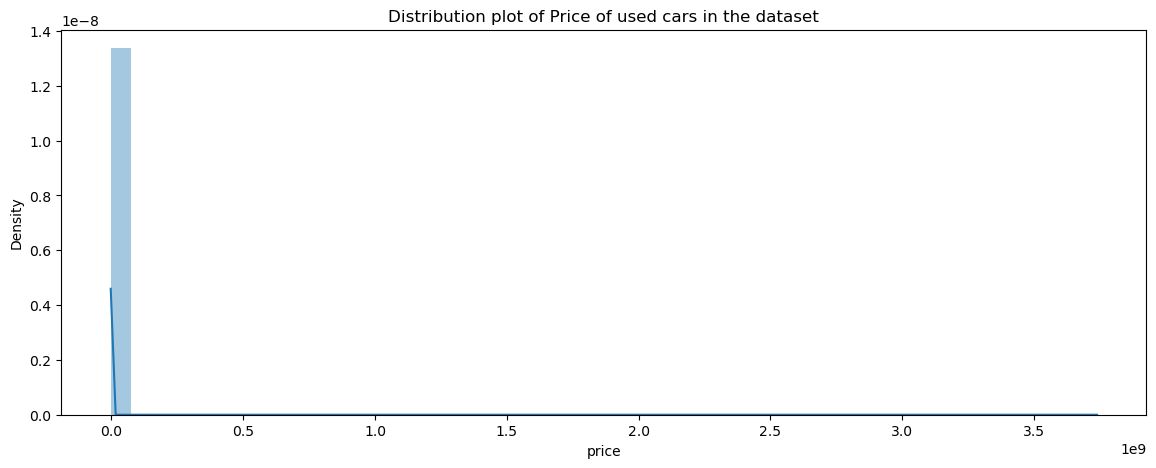

In [11]:
#Distribution plot of the price feature
plt.figure(figsize=(14,5))
sns.distplot(df1['price']).set(title = 'Distribution plot of Price of used cars in the dataset')
plt.show()

In [12]:
# Maximum, Minimum, Std dev and Mean value of price in the dataframe df1
print('Max:', df1['price'].max())
print('Min:', df1['price'].min())
print('Mean:', df1['price'].mean())
print('Std. Dev.:', df1['price'].std())

Max: 3736928711
Min: 0
Mean: 75199.0331873126
Std. Dev.: 12182282.173603749


We can observe from the figures above that the distribution of price is not consistent and outliers or errors in recording such data should be eliminated.
We will begin by removing any vehicle sold above 1 000 000 and below 100 to help when we perform an outlier test using z-score/std. dev. approach

In [13]:
#Eliminate outliers above 1 000 000 and below 100
df_price_out1 = df1[(df1['price'] < 1000000) & (df1['price'] > 100)]

/var/folders/9l/tll4c0w55jl7x9240bp48smc0000gp/T/ipykernel_4929/828783819.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_price_out1['price']).set(title = 'Distribution plot of Price of used cars in the dataset')
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


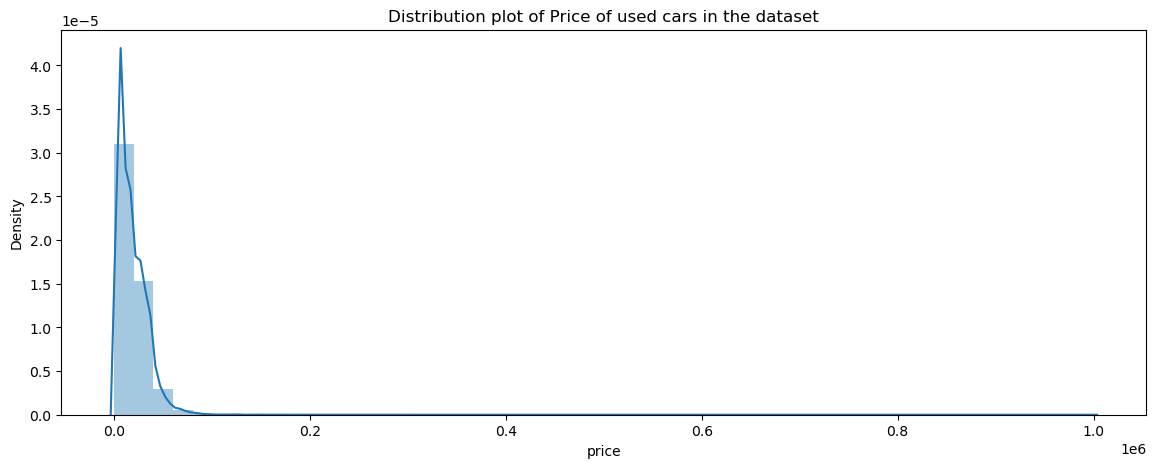

In [14]:
#Distribution plot of the price feature after removing very high outliers
plt.figure(figsize=(14,5))
sns.distplot(df_price_out1['price']).set(title = 'Distribution plot of Price of used cars in the dataset')
plt.show()

In [15]:
# Maximum, Minimum, Std dev and Mean value of price in the dataframe df_price_out1
print('Max:', df_price_out1['price'].max())
print('Min:', df_price_out1['price'].min())
print('Mean:', df_price_out1['price'].mean())
print('Std. Dev.:', df_price_out1['price'].std())

Max: 999999
Min: 101
Mean: 19085.296549198192
Std. Dev.: 15716.472154285577


In [16]:
# Calculate quartiles
Q1 = df_price_out1['price'].quantile(0.25)
Q3 = df_price_out1['price'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_price_out1[(df_price_out1['price'] < lower_bound) | (df_price_out1['price'] > upper_bound)]

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Number of outliers:", len(outliers))


Lower Bound: -23112.5
Upper Bound: 58507.5
Number of outliers: 7681


In [17]:
#Drop any observation outside of 3x std. dev. 
df_price_out2 = df_price_out1[(df_price_out1['price'] < 58507.5) & (df_price_out1['price'] > -23112.5)]

/var/folders/9l/tll4c0w55jl7x9240bp48smc0000gp/T/ipykernel_4929/3572450922.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_price_out2['price']).set(title = 'Distribution plot of Price of used cars in the dataset')
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


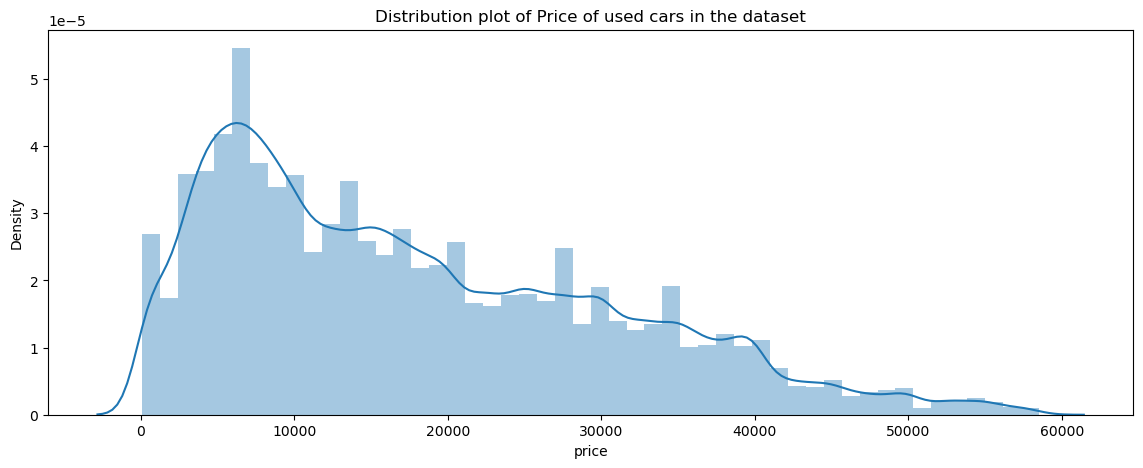

In [18]:
#Distribution plot of the price feature after the first iteration of outliers elimination
plt.figure(figsize=(14,5))
sns.distplot(df_price_out2['price']).set(title = 'Distribution plot of Price of used cars in the dataset')
plt.show()

[Text(0.5, 1.0, 'Box Plot of Price of used cars in the dataset after eliminating outliers')]

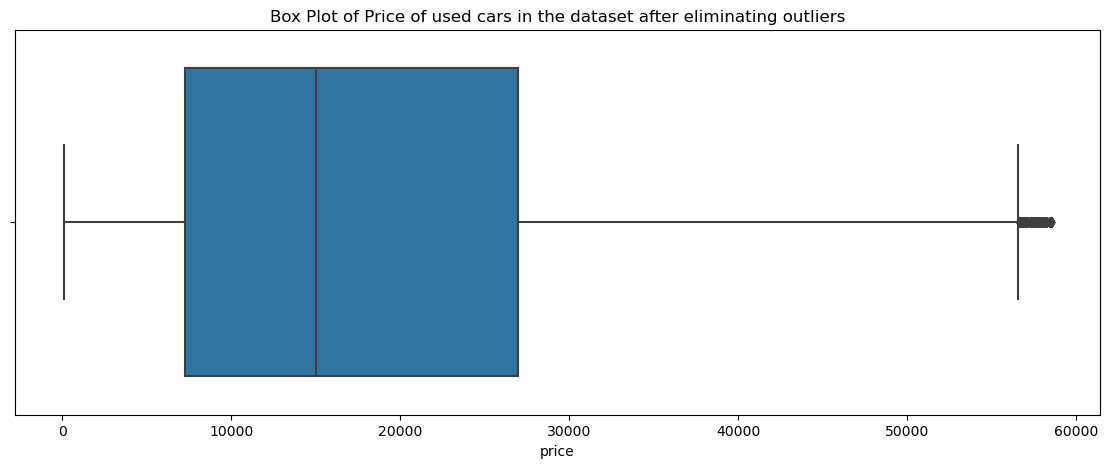

In [19]:
#box plot of 'price' after outlier elimination
plt.figure(figsize=(14,5))
sns.boxplot(data=df_price_out2,x='price').set(title="Box Plot of Price of used cars in the dataset after eliminating outliers")


### Year Outliers

In [20]:
df_price_out = df_price_out2

/var/folders/9l/tll4c0w55jl7x9240bp48smc0000gp/T/ipykernel_4929/202822903.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_price_out['year']).set(title = 'Distribution plot of Year of used cars in the dataset')
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


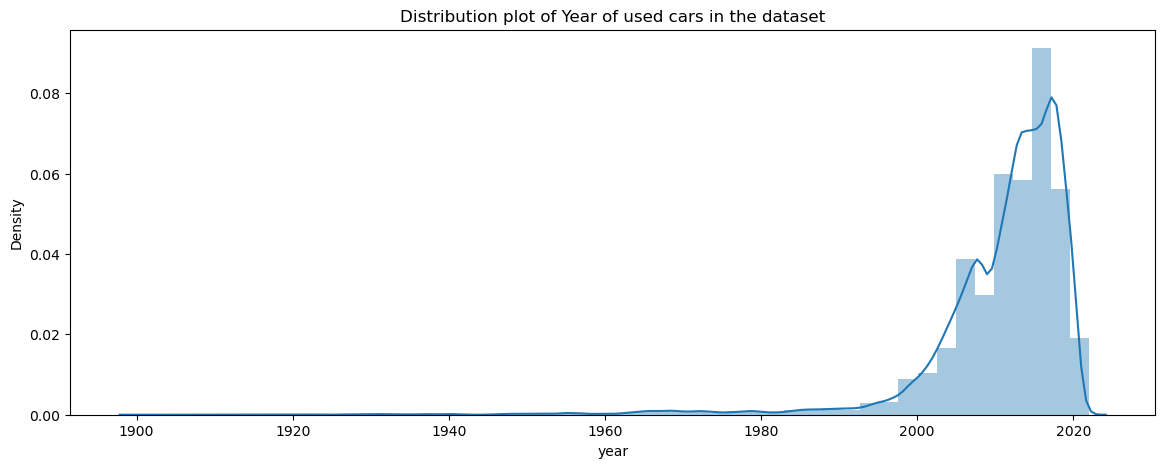

In [21]:
#Distribution plot of the year feature
plt.figure(figsize=(14,5))
sns.distplot(df_price_out['year']).set(title = 'Distribution plot of Year of used cars in the dataset')
plt.show()

In [22]:
# Maximum, Minimum, Std dev and Mean value of year in the dataframe df1
print('Max:', df_price_out['year'].max())
print('Min:', df_price_out['year'].min())
print('Mean:', df_price_out['year'].mean())
print('Std. Dev.:', df_price_out['year'].std())

Max: 2022.0
Min: 1900.0
Mean: 2010.942744432395
Std. Dev.: 9.488947289973408


In [23]:
import numpy as np

# Calculate quartiles
Q1 = df1['year'].quantile(0.25)
Q3 = df1['year'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df1[(df1['year'] < lower_bound) | (df1['year'] > upper_bound)]

# Print statistics
print('Max:', df1['year'].max())
print('Min:', df1['year'].min())
print('Mean:', df1['year'].mean())
print('Std. Dev.:', df1['year'].std())

# Print IQR boundaries
print('Lower Bound (IQR method):', lower_bound)
print('Upper Bound (IQR method):', upper_bound)

# Print number of outliers
print('Number of outliers (IQR method):', len(outliers))


Max: 2022.0
Min: 1900.0
Mean: 2011.23519116697
Std. Dev.: 9.452119581502558
Lower Bound (IQR method): 1994.5
Upper Bound (IQR method): 2030.5
Number of outliers (IQR method): 15896


In [24]:
#Drop any observation outside of 3x std. dev. 
df_year_out = df_price_out[(df_price_out['year'] < 2030.5) & (df_price_out['year'] > 1994.5)]

/var/folders/9l/tll4c0w55jl7x9240bp48smc0000gp/T/ipykernel_4929/658974790.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_year_out['year']).set(title = 'Distribution plot of Year of used cars in the dataset')
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


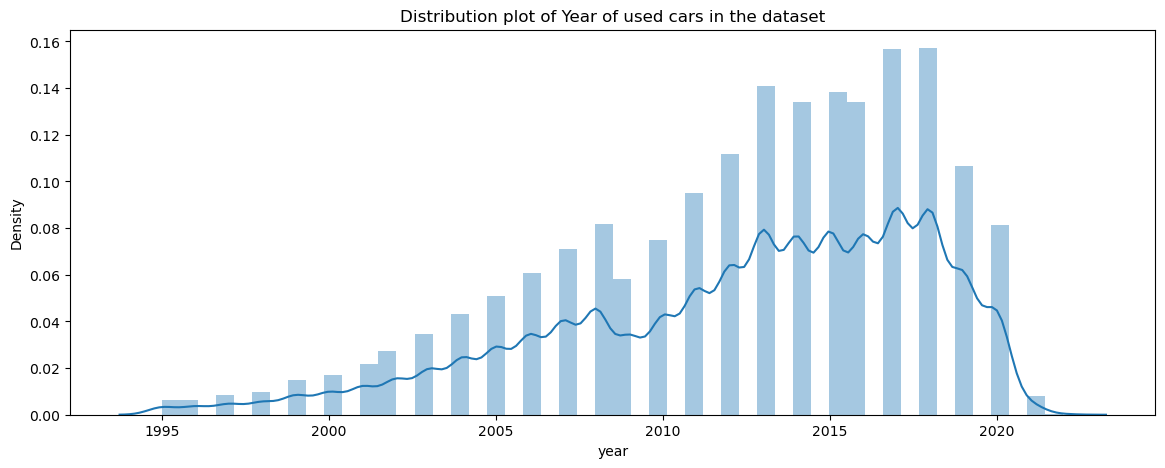

In [25]:
#Distribution plot of the year feature
plt.figure(figsize=(14,5))
sns.distplot(df_year_out['year']).set(title = 'Distribution plot of Year of used cars in the dataset')
plt.show()

[Text(0.5, 1.0, 'Box Plot of Year of used cars in the dataset after eliminating outliers')]

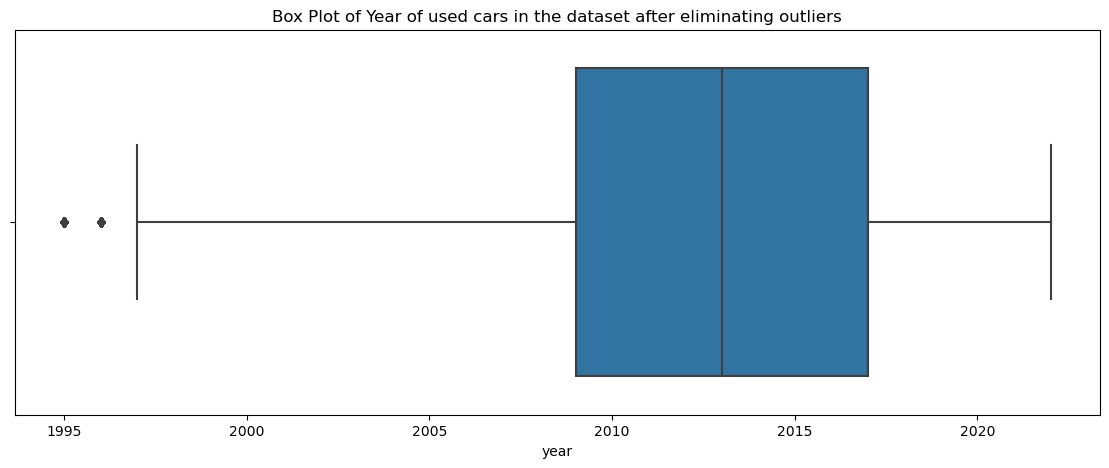

In [26]:
#box plot of 'Year' after outlier elimination
plt.figure(figsize=(14,5))
sns.boxplot(data=df_year_out,x='year').set(title="Box Plot of Year of used cars in the dataset after eliminating outliers")

### Odometer Outlier

/var/folders/9l/tll4c0w55jl7x9240bp48smc0000gp/T/ipykernel_4929/2038105600.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_year_out['odometer']).set(title = 'Distribution plot of odometer of used cars in the dataset')
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


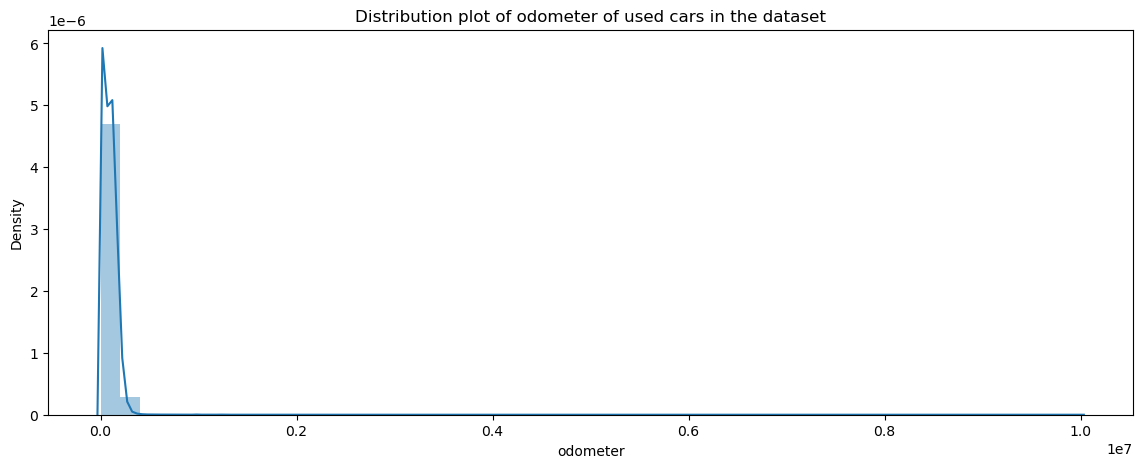

In [27]:
#Distribution plot of the odometer feature
plt.figure(figsize=(14,5))
sns.distplot(df_year_out['odometer']).set(title = 'Distribution plot of odometer of used cars in the dataset')
plt.show()

We will remove all observations above 500000 km since this is usually the maximum lifespan of an engine

In [28]:
#Drop any observation outside of 500 000km 
df_odom_out = df_year_out[(df_year_out['odometer'] < 500000)]

In [29]:
# Maximum, Minimum, Std dev and Mean value of odometer in the dataframe df1
print('Max:', df_odom_out['odometer'].max())
print('Min:', df_odom_out['odometer'].min())
print('Mean:', df_odom_out['odometer'].mean())
print('Std. Dev.:', df_odom_out['odometer'].std())

Max: 499232.0
Min: 0.0
Mean: 94126.80328544577
Std. Dev.: 63573.632796555474


In [30]:
import numpy as np

# Calculate quartiles
Q1_odom = df1['odometer'].quantile(0.25)
Q3_odom = df1['odometer'].quantile(0.75)

# Calculate IQR
IQR_odom = Q3_odom - Q1_odom

# Calculate outlier boundaries
lower_bound_odom = Q1_odom - 1.5 * IQR_odom
upper_bound_odom = Q3_odom + 1.5 * IQR_odom

# Identify outliers
outliers_odom = df1[(df1['odometer'] < lower_bound_odom) | (df1['odometer'] > upper_bound_odom)]

# Print statistics
print('Max Odometer:', df1['odometer'].max())
print('Min Odometer:', df1['odometer'].min())
print('Mean Odometer:', df1['odometer'].mean())
print('Std. Dev. Odometer:', df1['odometer'].std())

# Print IQR boundaries
print('Lower Bound (IQR method):', lower_bound_odom)
print('Upper Bound (IQR method):', upper_bound_odom)

# Print number of outliers
print('Number of outliers (IQR method):', len(outliers_odom))


Max Odometer: 10000000.0
Min Odometer: 0.0
Mean Odometer: 98043.33144290854
Std. Dev. Odometer: 213881.50079799347
Lower Bound (IQR method): -106053.75
Upper Bound (IQR method): 277300.25
Number of outliers (IQR method): 4385


In [31]:
#Drop any observation outside of 3x std. dev. 
df_odom_out = df_year_out[(df_year_out['odometer'] < 277300.25) & (df_year_out['odometer'] >  -106053.75)]

/var/folders/9l/tll4c0w55jl7x9240bp48smc0000gp/T/ipykernel_4929/3485579152.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_odom_out['odometer']).set(title = 'Distribution plot of odometer of used cars in the dataset')
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


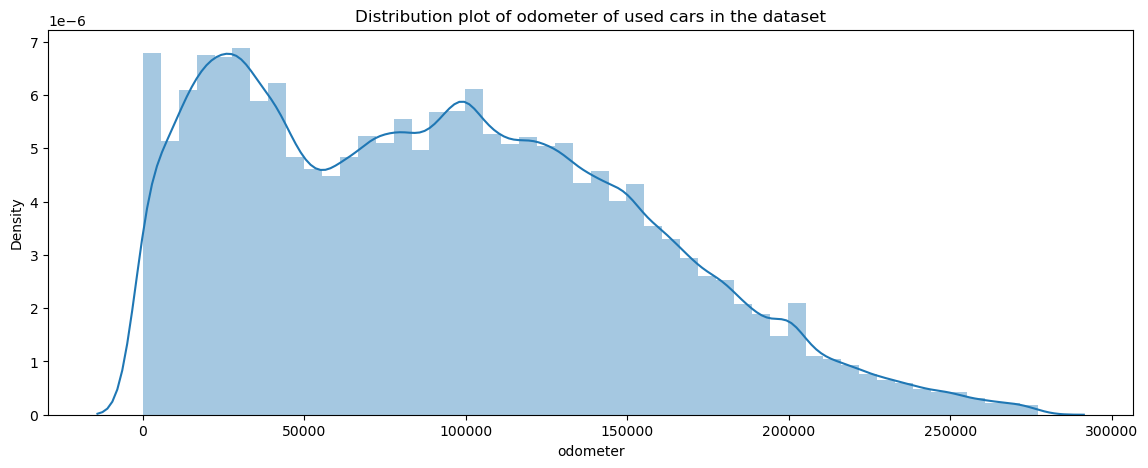

In [32]:
#Distribution plot of the odometer feature
plt.figure(figsize=(14,5))
sns.distplot(df_odom_out['odometer']).set(title = 'Distribution plot of odometer of used cars in the dataset')
plt.show()

[Text(0.5, 1.0, 'Box Plot of odometer of used cars in the dataset')]

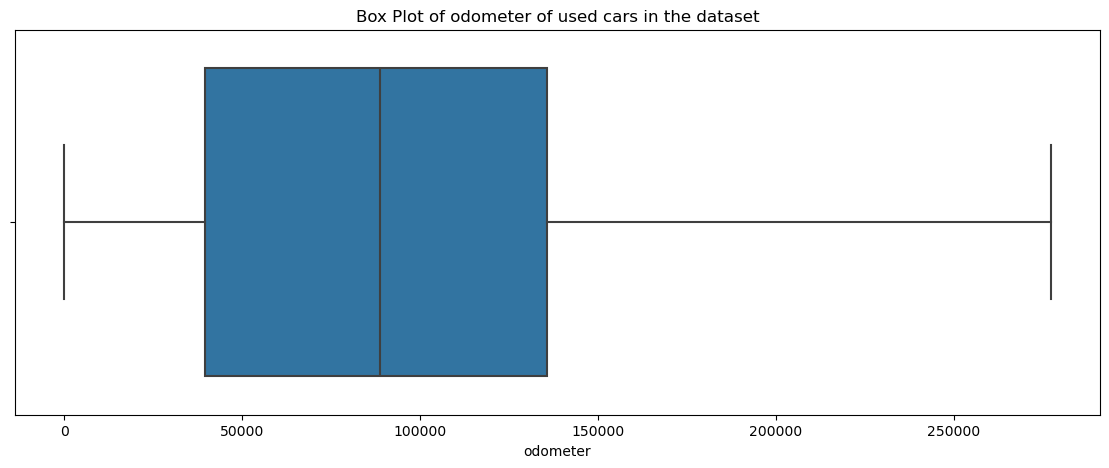

In [33]:

#box plot of 'year' to visualize outliers
plt.figure(figsize=(14,5))
sns.boxplot(data=df_odom_out,x='odometer').set(title="Box Plot of odometer of used cars in the dataset")

In [34]:
#How many observations do we have
df_odom_out.shape

(361346, 14)

In [35]:
#Rename final dataframe to something more meaningful
df_outl_clean = df_odom_out

### Addressing NaN values

In [36]:
# Reminder of NaN percentage in the current dataset
df_outl_clean.isna().sum()/df_outl_clean.shape[0]*100

region           0.000000
price            0.000000
year             0.000000
manufacturer     3.025078
condition       38.099218
cylinders       40.955483
fuel             0.575072
odometer         0.000000
title_status     1.933050
transmission     0.395743
drive           30.433435
type            20.696784
paint_color     29.271668
state            0.000000
dtype: float64

In [37]:
df_outl_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 361346 entries, 27 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        361346 non-null  object 
 1   price         361346 non-null  int64  
 2   year          361346 non-null  float64
 3   manufacturer  350415 non-null  object 
 4   condition     223676 non-null  object 
 5   cylinders     213355 non-null  object 
 6   fuel          359268 non-null  object 
 7   odometer      361346 non-null  float64
 8   title_status  354361 non-null  object 
 9   transmission  359916 non-null  object 
 10  drive         251376 non-null  object 
 11  type          286559 non-null  object 
 12  paint_color   255574 non-null  object 
 13  state         361346 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 41.4+ MB


The missing data is located in categorical variables. As I sampled the data, I did not find indication of persistent errors in the sampling of the missing data. For this reason, the missing data is random and we can impute the value for these variables. I will include a KNNImputer for integer missing variables if there are any. Any feature with more than 5% of data missing will be labelled as 'missing' data. This will create a new category when it will come to label encoding. Additionally, data with less than 5% of missing data will be imputed the mode of their class

### Impute Value of NaN

In [38]:
#create a copy of the dataframe
df_impute = df_outl_clean

In [39]:
# Preview the dataset
df_impute

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
27,auburn,33590,2014.0,gmc,good,8 cylinders,gas,57923.0,clean,other,NaN,pickup,white,al
28,auburn,22590,2010.0,chevrolet,good,8 cylinders,gas,71229.0,clean,other,NaN,pickup,blue,al
29,auburn,39590,2020.0,chevrolet,good,8 cylinders,gas,19160.0,clean,other,NaN,pickup,red,al
30,auburn,30990,2017.0,toyota,good,8 cylinders,gas,41124.0,clean,other,NaN,pickup,red,al
31,auburn,15000,2013.0,ford,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019.0,nissan,good,6 cylinders,gas,32226.0,clean,other,fwd,sedan,NaN,wy
426876,wyoming,30590,2020.0,volvo,good,NaN,gas,12029.0,clean,other,fwd,sedan,red,wy
426877,wyoming,34990,2020.0,cadillac,good,NaN,diesel,4174.0,clean,other,NaN,hatchback,white,wy
426878,wyoming,28990,2018.0,lexus,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,silver,wy


In [40]:
#Create a dictionary for the null values according to their percentage
null_dict = {}
for icol in df_outl_clean.columns.values:
    null_dict[icol] = ((df_outl_clean[icol].isna().sum())/df_outl_clean.shape[0])*100    
null_dict

{'region': 0.0,
 'price': 0.0,
 'year': 0.0,
 'manufacturer': 3.0250784566592683,
 'condition': 38.099217924094916,
 'cylinders': 40.95548311037067,
 'fuel': 0.5750720915687457,
 'odometer': 0.0,
 'title_status': 1.933050317424297,
 'transmission': 0.39574258466954115,
 'drive': 30.43343499028632,
 'type': 20.696783692084594,
 'paint_color': 29.271667598368325,
 'state': 0.0}

In [41]:
sorted_nulldict = {}
sorted_keys = sorted(null_dict, key = null_dict.get)  # [1, 3, 2]

for w in sorted_keys:
    sorted_nulldict[w] = null_dict[w]
sorted_nulldict

{'region': 0.0,
 'price': 0.0,
 'year': 0.0,
 'odometer': 0.0,
 'state': 0.0,
 'transmission': 0.39574258466954115,
 'fuel': 0.5750720915687457,
 'title_status': 1.933050317424297,
 'manufacturer': 3.0250784566592683,
 'type': 20.696783692084594,
 'paint_color': 29.271667598368325,
 'drive': 30.43343499028632,
 'condition': 38.099217924094916,
 'cylinders': 40.95548311037067}

In [42]:
#Identify which are categorical variables since KNNImputer cannot be performed on strings
cat_variables = df_impute[['region', 'manufacturer', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive',
                          'type', 'paint_color', 'state']]

In [43]:
from sklearn.impute import KNNImputer

# Assuming df_impute is your DataFrame and sorted_nulldict is a dictionary containing columns and their null percentages
imputer = KNNImputer(n_neighbors=5, weights="uniform")
for key in sorted_nulldict:
    if key in ['year', 'odometer']:  # Skip 'year' and 'odometer' since you're not imputing them with KNNImputer
        continue
    if sorted_nulldict[key] > 0 and sorted_nulldict[key] < 5:
        if key in cat_variables:  # If categorical, fill with mode
            df_impute.loc[:, key] = df_impute[key].fillna(df_impute[key].mode().iloc[0])
        else:  # Otherwise, use KNNImputer for numerical columns
            df_impute.loc[:, key] = imputer.fit_transform(df_impute[[key]])[:, 0]  # KNNImputer returns a numpy array

# Example for filling 'year' and 'odometer' with mode (assumed categorical)
for key in ['year', 'odometer']:
    df_impute.loc[:, key] = df_impute[key].fillna(df_impute[key].mode().iloc[0])


In [44]:
# Label NaN values as missing for features with more than 5% NaN values.

for key in sorted_nulldict:
    if key in ['VIN','size']:
        continue    
    if sorted_nulldict[key]>5 and key in cat_variables:
        df_impute[key] = df_impute[key].fillna('missing')

/var/folders/9l/tll4c0w55jl7x9240bp48smc0000gp/T/ipykernel_4929/2001261332.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_impute[key] = df_impute[key].fillna('missing')


In [45]:
#Confirm the operations worked
df_impute.head()

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
27,auburn,33590,2014.0,gmc,good,8 cylinders,gas,57923.0,clean,other,missing,pickup,white,al
28,auburn,22590,2010.0,chevrolet,good,8 cylinders,gas,71229.0,clean,other,missing,pickup,blue,al
29,auburn,39590,2020.0,chevrolet,good,8 cylinders,gas,19160.0,clean,other,missing,pickup,red,al
30,auburn,30990,2017.0,toyota,good,8 cylinders,gas,41124.0,clean,other,missing,pickup,red,al
31,auburn,15000,2013.0,ford,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al


In [46]:
#Confirm there are no more NaN
df_impute.isna().sum()/df_impute.shape[0]*100

region          0.0
price           0.0
year            0.0
manufacturer    0.0
condition       0.0
cylinders       0.0
fuel            0.0
odometer        0.0
title_status    0.0
transmission    0.0
drive           0.0
type            0.0
paint_color     0.0
state           0.0
dtype: float64

### OneHotEncoder

In [47]:
from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder instance
one_hot_encoder = OneHotEncoder()

# Initialize a new DataFrame to store encoded features
df_encoded_oneHot = df_impute.copy()

# Iterate through each categorical variable for encoding
for i in cat_variables:
    # Perform One-Hot Encoding and add to df_encoded
    encoded_data = one_hot_encoder.fit_transform(df_impute[[i]])
    
    # Convert the sparse matrix to a DataFrame and merge with df_encoded
    encoded_df = pd.DataFrame(encoded_data.toarray(), columns=one_hot_encoder.get_feature_names_out([i]))
    df_encoded_oneHot = pd.concat([df_encoded_oneHot, encoded_df], axis=1)
    
    # Drop the original categorical column from df_encoded
    df_encoded_oneHot.drop(i, axis=1, inplace=True)

    # Print feature names after encoding
    print(f"Encoded features for {i}:")
    print(one_hot_encoder.get_feature_names_out([i]))
    print('\n-----------\n')

# Display the encoded DataFrame
print(df_encoded_oneHot.head())

# Display the number of rows in the encoded DataFrame
print(f"Number of rows in df_encoded_oneHot: {df_encoded_oneHot.shape[1]}")


Encoded features for region:
['region_SF bay area' 'region_abilene' 'region_akron / canton'
 'region_albany' 'region_albuquerque' 'region_altoona-johnstown'
 'region_amarillo' 'region_ames' 'region_anchorage / mat-su'
 'region_ann arbor' 'region_annapolis' 'region_appleton-oshkosh-FDL'
 'region_asheville' 'region_ashtabula' 'region_athens' 'region_atlanta'
 'region_auburn' 'region_augusta' 'region_austin' 'region_bakersfield'
 'region_baltimore' 'region_baton rouge' 'region_battle creek'
 'region_beaumont / port arthur' 'region_bellingham' 'region_bemidji'
 'region_bend' 'region_billings' 'region_binghamton' 'region_birmingham'
 'region_bismarck' 'region_bloomington' 'region_bloomington-normal'
 'region_boise' 'region_boone' 'region_boston' 'region_boulder'
 'region_bowling green' 'region_bozeman' 'region_brainerd'
 'region_brownsville' 'region_brunswick' 'region_buffalo' 'region_butte'
 'region_cape cod / islands' 'region_catskills' 'region_cedar rapids'
 'region_central NJ' 'region_c

### LabelEncoding

In [48]:
# Importing necessary libraries
from sklearn import preprocessing
import pandas as pd

# Initialize LabelEncoder
le = preprocessing.LabelEncoder()

# Initialize a new DataFrame to store encoded features
df_encode = df_impute.copy()

# Iterate through each categorical variable for encoding
for i in cat_variables:
    df_encode[i] = le.fit_transform(df_impute[i])
    
    # Print the label encoding mapping for each categorical variable
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"Label encoding mapping for {i}:")
    print(le_name_mapping)
    print('\n-----------\n')

# Print number of columns in the encoded DataFrame
print(f"Number of columns in df_encode: {df_encode.shape[1]}")


Label encoding mapping for region:
{'SF bay area': 0, 'abilene': 1, 'akron / canton': 2, 'albany': 3, 'albuquerque': 4, 'altoona-johnstown': 5, 'amarillo': 6, 'ames': 7, 'anchorage / mat-su': 8, 'ann arbor': 9, 'annapolis': 10, 'appleton-oshkosh-FDL': 11, 'asheville': 12, 'ashtabula': 13, 'athens': 14, 'atlanta': 15, 'auburn': 16, 'augusta': 17, 'austin': 18, 'bakersfield': 19, 'baltimore': 20, 'baton rouge': 21, 'battle creek': 22, 'beaumont / port arthur': 23, 'bellingham': 24, 'bemidji': 25, 'bend': 26, 'billings': 27, 'binghamton': 28, 'birmingham': 29, 'bismarck': 30, 'bloomington': 31, 'bloomington-normal': 32, 'boise': 33, 'boone': 34, 'boston': 35, 'boulder': 36, 'bowling green': 37, 'bozeman': 38, 'brainerd': 39, 'brownsville': 40, 'brunswick': 41, 'buffalo': 42, 'butte': 43, 'cape cod / islands': 44, 'catskills': 45, 'cedar rapids': 46, 'central NJ': 47, 'central louisiana': 48, 'central michigan': 49, 'champaign urbana': 50, 'charleston': 51, 'charlotte': 52, 'charlottesvill

OneHotEncoding will be computationally expensive so, let's use LabelEncoding

In [49]:
df_encode

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
27,16,33590,2014.0,13,2,6,2,57923.0,0,2,2,9,11,1
28,16,22590,2010.0,7,2,6,2,71229.0,0,2,2,9,1,1
29,16,39590,2020.0,7,2,6,2,19160.0,0,2,2,9,9,1
30,16,30990,2017.0,38,2,6,2,41124.0,0,2,2,9,9,1
31,16,15000,2013.0,12,0,5,2,128000.0,0,0,3,11,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,397,23590,2019.0,30,2,5,2,32226.0,0,2,1,10,6,50
426876,397,30590,2020.0,40,2,7,2,12029.0,0,2,1,10,9,50
426877,397,34990,2020.0,6,2,7,0,4174.0,0,2,2,4,11,50
426878,397,28990,2018.0,22,2,5,2,30112.0,0,2,1,10,10,50


#### Correlation

In [50]:
#Create a copy of the encoded data
df_final = df_encode.copy()

In [51]:
print(df_final.columns)

Index(['region', 'price', 'year', 'manufacturer', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'state'],
      dtype='object')


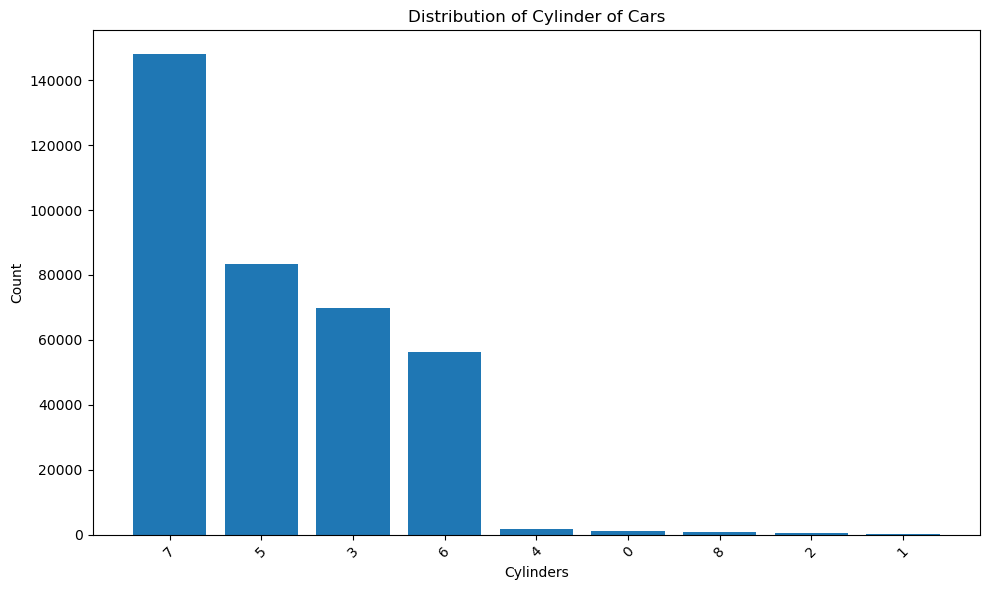

In [52]:
import matplotlib.pyplot as plt

# Count the occurrences of each unique value in 'cylinders' column
cylinder_counts = df_final['cylinders'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(cylinder_counts.index.astype(str), cylinder_counts.values)
plt.xlabel('Cylinders')
plt.ylabel('Count')
plt.title('Distribution of Cylinder of Cars')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [53]:
#First Sample for features of price, year, odometer, transmission and type
sample_cars = df_final[['price', 'year','odometer', 'transmission','type']]
sample_cars = sample_cars.sample(n = 10000, random_state =1)
sample_cars

,price,year,odometer,transmission,type
407477,11888,2013.0,77750.0,0,0
131953,4750,2008.0,100715.0,0,6
282022,8995,2007.0,172700.0,0,0
371072,31591,2018.0,69283.0,0,9
89205,10995,2013.0,77593.0,0,0
...,...,...,...,...,...
394494,7800,2007.0,129580.0,0,2
192530,13500,2010.0,72119.0,0,0
106524,26982,2014.0,78069.0,0,0
265210,25997,2014.0,43252.0,0,9


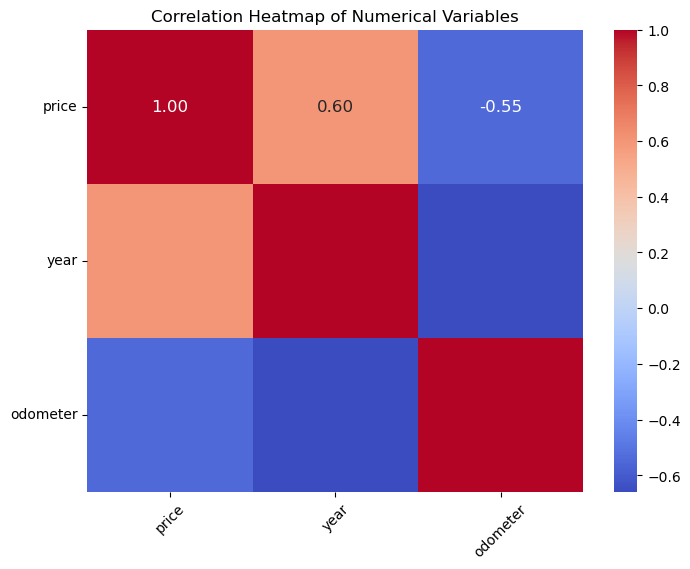

In [54]:
numerical_cols = ['price', 'year', 'odometer']

# Calculate correlation matrix
corr_matrix = sample_cars[numerical_cols].corr()

# Create a heatmap with customized colormap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 12})
plt.title('Correlation Heatmap of Numerical Variables')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


- **Price vs. Year**: There is a positive correlation of 0.60, indicating that as the year increases (i.e., the car is newer), the price tends to increase.
- **Price vs. Odometer**: There is a negative correlation of -0.55, suggesting that as the odometer reading increases (i.e., the car has been driven more), the price tends to decrease.
- **Year vs. Odometer**: There is a strong negative correlation of -0.55, indicating that newer cars tend to have lower odometer readings.

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

To begin my analysis, I will perform several regression models, including linear regression and polynomial regressions of degrees 2, 3, and 4. I anticipate that models beyond degree 4 may require excessive computational resources.

These initial models will help me determine the most suitable approach for further analysis. I will evaluate the performance of each model using the Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (R²) score. Additionally, I will consider the computational cost associated with higher-degree polynomials to ensure the feasibility of exploring more complex regression models.

### Regression

In [55]:
# split the data into training data and develoment data using 

X = df_final.drop(columns = ['price'])
y = df_final['price']
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, shuffle=True)

In [56]:
X_train

,region,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
63773,351,2012.0,15,2,3,2,58385.0,0,0,1,3,0,4
263900,3,2012.0,4,4,7,2,100000.0,0,0,0,6,6,34
52286,294,2014.0,23,2,7,4,96362.0,0,2,2,10,1,4
210230,371,2005.0,12,2,6,2,144000.0,0,0,0,9,5,22
207190,228,2013.0,8,4,5,2,95884.0,0,0,0,10,5,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142989,76,2020.0,5,2,7,4,2212.0,0,2,2,8,0,14
303758,403,2010.0,7,2,6,2,16903.0,0,2,3,3,12,35
156469,81,2008.0,7,4,5,2,142000.0,5,0,2,6,0,12
173508,198,2014.0,12,2,6,0,39253.0,0,0,0,11,11,17


### Linear Regression

In [57]:
#Building a pipeline for the linear regression

Linear_pipe =  Pipeline([('scaler', StandardScaler()),
                     ('linear', LinearRegression())])


#Perform Linear regression on the data

Linear_pipe.fit(X_train, y_train)
train_predict=Linear_pipe.predict(X_train)
test_predict=Linear_pipe.predict(X_test)


#Regression Error
Linear_train_mse = mean_squared_error(train_predict, y_train)
Linear_test_mse = mean_squared_error(test_predict, y_test)
Linear_train_mae = mean_absolute_error(train_predict, y_train)
Linear_test_mae = mean_absolute_error(test_predict, y_test)



#Check
linear_coefs = Linear_pipe.named_steps['linear'].coef_
print(Linear_pipe)
print(linear_coefs)  

print(f"Linear Model: train_mse={Linear_train_mse}, test_mse={Linear_test_mse}")
print(f"Linear Model: train_mae={Linear_train_mae}, test_mae={Linear_test_mae}")
print(Linear_pipe.score(X_test, y_test))

Pipeline(steps=[('scaler', StandardScaler()), ('linear', LinearRegression())])
[ -120.22370363  5130.98617722  -433.10180552   104.49450092
  2465.54115924 -2367.92807364 -3213.97118499  -841.79803139
  1669.64336297 -1214.71596874   479.4780535    341.73616139
   -41.89011177]
Linear Model: train_mse=83885896.9750072, test_mse=84636829.12031384
Linear Model: train_mae=6941.060355601897, test_mae=6963.159035182285
0.4822981727400254


## Polynomial Regression degree 2

In [61]:
#Building a pipeline for the polynomial regression

Poly2_pipe =  Pipeline([('scaler', StandardScaler()),
                     ('feature_transform', PolynomialFeatures(degree=2, include_bias=False)),
                       ('linear', LinearRegression())])


#Perform polynomial regression on the data

Poly2_pipe.fit(X_train, y_train)
train_predict=Poly2_pipe.predict(X_train)
test_predict=Poly2_pipe.predict(X_test)


#Regression Error
Poly2_train_mse = mean_squared_error(train_predict, y_train)
Poly2_test_mse = mean_squared_error(test_predict, y_test)
Poly2_train_mae = mean_absolute_error(train_predict, y_train)
Poly2_test_mae = mean_absolute_error(test_predict, y_test)



#Check
Poly2_coefs = Poly2_pipe.named_steps['linear'].coef_
print(Poly2_pipe)
print(Poly2_coefs)  

print(f"Polynomial Degree 2 Model: train_mse={Poly2_train_mse}, test_mse={Poly2_test_mse}")
print(f"Polynomial Degree 2 Model: train_mae={Poly2_train_mae}, test_mae={Poly2_test_mae}")
print(Poly2_pipe.score(X_test, y_test))

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_transform', PolynomialFeatures(include_bias=False)),
                ('linear', LinearRegression())])
[-7.16221260e+01  6.51421085e+03 -3.65654246e+02  3.52131580e+02
  8.09085791e+02 -1.54526667e+03 -3.02869749e+03 -6.70931051e+02
 -3.02802767e+02 -1.61049843e+03 -2.73987641e+01  3.20861651e+02
 -1.30091652e+02  1.14055708e+02 -3.19158382e+01 -7.05093075e+01
  3.06224812e+01  4.94502749e+01  1.06305017e+02  1.89220350e+01
 -3.37740777e+01 -1.16844209e+01  9.45416220e+00 -1.87973254e+01
  2.22250202e+01  3.82767853e+01  1.45619542e+03 -2.38110657e+02
  1.52299539e+01  7.60800199e+02 -7.17237205e+02 -1.68477379e+02
 -2.17626856e+02 -6.93327100e+02 -2.45486525e+02  1.77895951e+02
 -5.06743315e+01  1.90918686e+02  4.49359563e+02 -7.62211529e+00
  1.42418187e+01  2.55555100e+01  2.41337269e+02  8.87681852e+00
 -3.48857522e+01 -5.52804365e+01 -1.40106061e+02  2.48938006e+00
  4.98234643e+01  2.19183977e+01  2.49034040e+

## Polynomial Regression degree 3

In [59]:
#Building a pipeline for the polynomial regression

Poly3_pipe =  Pipeline([('scaler', StandardScaler()),
                     ('feature_transform', PolynomialFeatures(degree=3, include_bias=False)),
                       ('linear', LinearRegression())])


#Perform polynomial regression on the data

Poly3_pipe.fit(X_train, y_train)
train_predict=Poly3_pipe.predict(X_train)
test_predict=Poly3_pipe.predict(X_test)


#Regression Error
Poly3_train_mse = mean_squared_error(train_predict, y_train)
Poly3_test_mse = mean_squared_error(test_predict, y_test)
Poly3_train_mae = mean_absolute_error(train_predict, y_train)
Poly3_test_mae = mean_absolute_error(test_predict, y_test)



#Check
Poly3_coefs = Poly3_pipe.named_steps['linear'].coef_
print(Poly3_pipe)
print(Poly3_coefs)  

print(f"Polynomial Degree 3 Model: train_mse={Poly3_train_mse}, test_mse={Poly3_test_mse}")
print(f"Polynomial Degree 3 Model: train_mae={Poly3_train_mae}, test_mae={Poly3_test_mae}")
print(Poly3_pipe.score(X_test, y_test))

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_transform',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('linear', LinearRegression())])
[ 2.53677759e+01  5.83388431e+03 -4.70403268e+02  1.26454750e+03
  4.67494298e+02 -2.46513037e+02 -4.12646367e+03  4.30181562e+02
  2.05022819e+08  2.18085648e+03  2.69850128e+02 -4.37126751e+02
  1.16661453e+02  5.84160272e+01 -1.31468913e+02 -3.68149756e+01
  3.55366083e+01  2.10844805e+01  1.33432280e+02 -2.60183039e+01
 -8.07077569e+01  1.57919383e+01  3.57524167e+00 -1.30150820e+01
  2.56155852e+01  6.25928209e+00  1.07833346e+03 -5.38665575e+02
 -3.71979505e+01  7.63222949e+02 -5.00343984e+02 -7.93805516e+02
 -5.77425648e+01 -1.38643933e+03 -9.99497302e+02  3.26290681e+02
 -1.42552388e+02  1.25977489e+02  3.23565416e+02  7.27588049e+01
 -4.77097715e+02 -1.38334256e+01  2.45745011e+01  1.58331065e+02
 -1.49158078e+02 -1.06732870e+02  4.78694230e+01 -4.07843318e+01
  3.27204200e+01 -3

### Polynomial Regression degree 4

In [58]:
#Building a pipeline for the linear regression

Poly4_pipe =  Pipeline([('scaler', StandardScaler()),
                     ('feature_transform', PolynomialFeatures(degree=4, include_bias=False)),
                       ('linear', LinearRegression())])

#Perform polynomial regression on the data
Poly4_pipe.fit(X_train, y_train)
train_predict=Poly4_pipe.predict(X_train)
test_predict=Poly4_pipe.predict(X_test)

#Regression Error
Poly4_train_mse = mean_squared_error(train_predict, y_train)
Poly4_test_mse = mean_squared_error(test_predict, y_test)
Poly4_train_mae = mean_absolute_error(train_predict, y_train)
Poly4_test_mae = mean_absolute_error(test_predict, y_test)


#Check
Poly4_coefs = Poly4_pipe.named_steps['linear'].coef_
print(Poly4_pipe)
print(Poly4_coefs)  

print(f"Polynomial Degree 4 Model: train_mse={Poly4_train_mse}, test_mse={Poly4_test_mse}")
print(f"Polynomial Degree 4 Model: train_mae={Poly4_train_mae}, test_mae={Poly4_test_mae}")
print(Poly4_pipe.score(X_test, y_test))

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_transform',
                 PolynomialFeatures(degree=4, include_bias=False)),
                ('linear', LinearRegression())])
[-1.67892498e+07 -8.71432433e+11  6.48825309e+12 ...  2.25846794e+02
 -6.63822536e+01  1.21042656e+02]
Polynomial Degree 4 Model: train_mse=44499701.28437287, test_mse=46311583.55005129
Polynomial Degree 4 Model: train_mae=4554.877560666854, test_mae=4627.334079813796
0.7167238934119036


# Regression Model Performance Summary

| Model                    | Train MSE         | Test MSE          | Train MAE       | Test MAE        | R² Score (Test) |
|--------------------------|-------------------|-------------------|-----------------|-----------------|-----------------|
| Linear Regression        | 83,885,896.98     | 84,636,829.12     | 6,941.06        | 6,963.16        | 0.4823          |
| Polynomial Degree 2      | 59,445,272.38     | 60,268,772.29     | 5,494.77        | 5,518.43        | 0.6314          |
| Polynomial Degree 3      | 49,857,795.67     | 50,789,617.50     | 4,894.22        | 4,925.46        | 0.6893          |
| Polynomial Degree 4      | 44,499,701.28     | 46,311,583.55     | 4,554.88        | 4,627.33        | 0.7167          |

### Summary
- **Linear Regression**: This model has the highest MSE and MAE, indicating it may not capture the complexity of the data as well as polynomial models. The R² score is also the lowest.
- **Polynomial Regression (Degree 2)**: Shows a significant improvement over linear regression in terms of MSE, MAE, and R² score.
- **Polynomial Regression (Degree 3)**: Further improves MSE, MAE, and R² score, indicating a better fit to the data compared to degree 2.
- **Polynomial Regression (Degree 4)**: Provides the best performance in terms of MSE, MAE, and R² score among the models tested. However, it also implies higher computational cost.

### Conclusion
Based on the evaluation metrics, Polynomial Regression of Degree 4 shows the best performance but with increased computational cost. Moving forward, I will weigh the computational feasibility of higher-degree models and their performance improvements to decide on the most appropriate model for further analysis.


## Polynomial Regression degree 3 - LASSO

In [63]:
#We now try using lasso to offer a penalized regression method

Lasso3_pipe =  Pipeline([('scaler', StandardScaler()),
                     ('feature_transform', PolynomialFeatures(degree=3, include_bias=False)),
                       ('lasso', Lasso(random_state=42))])

#Perform polynomial regression on the data

Lasso3_pipe =Lasso3_pipe.fit(X_train, y_train)
train_predict=Lasso3_pipe.predict(X_train)
test_predict=Lasso3_pipe.predict(X_test)


#Regression Error
Lasso3_train_mse = mean_squared_error(train_predict, y_train)
Lasso3_test_mse = mean_squared_error(test_predict, y_test)
Lasso3_train_mae = mean_absolute_error(train_predict, y_train)
Lasso3_test_mae = mean_absolute_error(test_predict, y_test)



#Check
Lasso3_coefs = Lasso3_pipe.named_steps['lasso'].coef_
print(Lasso3_pipe)
print(Lasso3_coefs)  

print(f"Lasso Degree 3 Model: train_mse={Lasso3_train_mse}, test_mse={Lasso3_test_mse}")
print(f"Lasso Degree 3 Model: train_mae={Lasso3_train_mae}, test_mae={Lasso3_test_mae}")
print(Lasso3_pipe.score(X_test, y_test))

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.578e+12, tolerance: 4.117e+09
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_transform',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('lasso', Lasso(random_state=42))])
[ 1.95908103e+00  5.88705571e+03 -4.11480566e+02  1.21359617e+03
  4.63616615e+02 -6.00518855e+01 -4.05222286e+03  0.00000000e+00
  2.96372625e+03  2.15503263e+03  2.42464003e+02 -3.34079206e+02
  4.60927274e+01  5.76308566e+01 -1.23806927e+02 -3.74838500e+01
  3.20576944e+01  2.12371818e+01  1.30205673e+02 -1.87287882e+01
 -2.98608016e+01 -0.00000000e+00  2.73434360e+00 -1.24176306e+01
  2.37590491e+01  5.40142649e+00  1.09351875e+03 -5.29419919e+02
 -1.90672103e+01  7.45927950e+02 -4.87224785e+02 -7.64911636e+02
 -1.30911751e+00 -1.30622269e+03 -9.84858885e+02  3.16226880e+02
 -1.32509697e+02  1.17276161e+02  3.26102376e+02  6.81638571e+01
 -4.73302792e+02 -1.65051533e+01  2.81988584e+01  7.36948968e+01
 -8.74202960e+01 -1.05959204e+02  4.36988349e+01 -3.84129761e+01
  3.19270552e+01

## Polynomial Regression degree 3 - Cross Validation

In [85]:
#Building a pipeline for the linear regression

Poly3_pipe =  Pipeline([('scaler', StandardScaler()),
                     ('feature_transform', PolynomialFeatures(degree=3, include_bias=False)),
                       ('linear', LinearRegression())])


#Perform polynomial regression on the data

Poly3 =Poly3_pipe.fit(X_train, y_train)

# Permutation importance
feature_importance_poly3 = {}
r = permutation_importance(Poly3, X_test, y_test , n_repeats=30,random_state=0)
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{X_test.columns[i]:<8}"
        f"  {r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")
        feature_importance_poly3[X_test.columns[i]]=r.importances_mean[i]

year      0.439 +/- 0.002
odometer  0.148 +/- 0.001
drive     0.142 +/- 0.001
cylinders  0.124 +/- 0.001
fuel      0.112 +/- 0.001
transmission  0.029 +/- 0.001
type      0.019 +/- 0.000
condition  0.016 +/- 0.000
title_status  0.015 +/- 0.000
manufacturer  0.010 +/- 0.000
paint_color  0.010 +/- 0.000
state     0.004 +/- 0.000
region    0.001 +/- 0.000


In [66]:
Poly3.score(X_test, y_test)

0.6893329055877657

In [87]:
#create a feature importance DF
feature_importance_poly3 = pd.DataFrame(feature_importance_poly3,index=[0]).T
feature_importance_poly3 = feature_importance_poly3.rename(columns={0: "Feature Importance for Polynomial Degree 3"})
feature_importance_poly3

,Feature Importance for Polynomial Degree 3
year,0.439204
odometer,0.147962
drive,0.142006
cylinders,0.124415
fuel,0.112403
transmission,0.029239
type,0.018814
condition,0.016079
title_status,0.014909
manufacturer,0.010298


In [88]:
#Coefficient Importance

feature_names = Poly3[:-1].get_feature_names_out()

coefs_Poly3 = pd.DataFrame(
    Poly3[-1].coef_,
    columns=["Coefficients"],
    index=feature_names,
)
coefs_Poly3.sort_values(by=['Coefficients'], ascending=False)

,Coefficients
transmission^3,7.557022e+08
transmission,2.050228e+08
year,5.833884e+03
drive^2,4.020272e+03
drive,2.180856e+03
...,...
year transmission,-1.386439e+03
drive^3,-2.102274e+03
cylinders^2,-3.519472e+03
odometer,-4.126464e+03


Using permutation importance, we can see that the year was by far the best feature to predict the price variation.

Other variables that impacted the price were odometer, drive, cylinders, and fuel. Surprisingly, these features were very close in their predictive power, something we were not capable of detecting through our correlation matrix.

Interestingly, the transmission of the vehicle seems to impact the price of a used vehicle greatly. With year and drive being 2nd and 3rd when looking at the size of the coefficients, it suggests a significant influence on the pricing of used vehicles.

## Ridge Regression

In [69]:
#Building a pipeline for the ridge regression
Ridge_Poly3_pipe =  Pipeline([('scaler', StandardScaler()),
                     ('feature_transform', PolynomialFeatures(degree=3, include_bias=False)),
                       ('ridge', Ridge())])


#Perform ridge regression on the data
Ridge3 = Ridge_Poly3_pipe.fit(X_train, y_train)
train_predict=Ridge3.predict(X_train)
test_predict=Ridge3.predict(X_test)


#Regression Error
Ridge3_train_mse = mean_squared_error(train_predict, y_train)
Ridge3_test_mse = mean_squared_error(test_predict, y_test)
Ridge3_train_mae = mean_absolute_error(train_predict, y_train)
Ridge3_test_mae = mean_absolute_error(test_predict, y_test)



#Check
print(Ridge3)


print(f"Ridge Degree 3 Model: train_mse={Ridge3_train_mse}, test_mse={Ridge3_test_mse}")
print(f"Ridge Degree 3 Model: train_mae={Ridge3_train_mae}, test_mae={Ridge3_test_mae}")
print(Ridge3.score(X_test, y_test))

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_transform',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('ridge', Ridge())])
Ridge Degree 3 Model: train_mse=49857795.70692102, test_mse=50789586.4216673
Ridge Degree 3 Model: train_mae=4894.2116987228255, test_mae=4925.457927309906
0.6893330956562891


### GridSearch Ridge

In [70]:
#Create the alpha parameter dictionary
param_dict = {'ridge__alpha':[1,10,100,1000]}

#GridSearch
Opt_Ridge3 = GridSearchCV(Ridge_Poly3_pipe, param_grid=param_dict)
Opt_Ridge3.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('feature_transform',
                                        PolynomialFeatures(degree=3,
                                                           include_bias=False)),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [1, 10, 100, 1000]})

In [71]:
#Use the Ridge to predict
train_predict=Opt_Ridge3.predict(X_train)
test_predict=Opt_Ridge3.predict(X_test)


#Regression Error
Opt_Ridge3_train_mse = mean_squared_error(train_predict, y_train)
Opt_Ridge3_test_mse = mean_squared_error(test_predict, y_test)
Opt_Ridge3_train_mae = mean_absolute_error(train_predict, y_train)
Opt_Ridge3_test_mae = mean_absolute_error(test_predict, y_test)



#Check
print(f"Opt_Ridge Degree 3 Model: train_mse={Opt_Ridge3_train_mse}, test_mse={Opt_Ridge3_test_mse}")
print(f"Opt_Ridge Degree 3 Model: train_mae={Opt_Ridge3_train_mae}, test_mae={Opt_Ridge3_test_mae}")
print(Opt_Ridge3.score(X_test, y_test))

Opt_Ridge Degree 3 Model: train_mse=49858202.48311937, test_mse=50787047.77059973
Opt_Ridge Degree 3 Model: train_mae=4893.884617982704, test_mae=4925.075900325591
0.6893486239352914


In [72]:
best_alpha = Opt_Ridge3.best_params_
best_alpha

{'ridge__alpha': 100}

In [75]:
# Using Premutation importance for selecting features

r = permutation_importance(Optimal_Ridge_Pipeline, X_test, y_test, n_repeats=30, random_state=42)
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2* r.importances_std[i] >0:
        print(f"{X_test.columns[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

year    0.438 +/- 0.002
odometer0.148 +/- 0.001
drive   0.141 +/- 0.001
cylinders0.124 +/- 0.001
fuel    0.113 +/- 0.001
transmission0.029 +/- 0.001
type    0.019 +/- 0.000
condition0.016 +/- 0.000
title_status0.015 +/- 0.000
paint_color0.010 +/- 0.000
manufacturer0.010 +/- 0.000
state   0.004 +/- 0.000
region  0.001 +/- 0.000


| Model                     | Train MSE         | Test MSE          | Train MAE       | Test MAE        | R² Score (Test) |
|---------------------------|-------------------|-------------------|-----------------|-----------------|-----------------|
| Linear Regression         | 83,885,896.98     | 84,636,829.12     | 6,941.06        | 6,963.16        | 0.4823          |
| Polynomial Degree 2       | 59,445,272.38     | 60,268,772.29     | 5,494.77        | 5,518.43        | 0.6314          |
| Polynomial Degree 3       | 49,857,795.67     | 50,789,617.50     | 4,894.22        | 4,925.46        | 0.6893          |
| Polynomial Degree 4       | 44,499,701.28     | 46,311,583.55     | 4,554.88        | 4,627.33        | 0.7167          |
| Lasso Regression (Degree 3)| 49,862,361.33     | 50,786,715.52     | 4,893.22        | 4,924.48        | 0.6894          |
| Ridge Regression (Degree 3)| 49,857,795.67     | 50,789,617.50     | 4,894.21        | 4,925.46        | 0.6893          |

K-Fold Ridge regression using GridSearchCV was computationally expensive to perform.

# Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

## Regression Model Performance Summary

| Model                     | Train MSE         | Test MSE          | Train MAE       | Test MAE        | R² Score (Test) |
|---------------------------|-------------------|-------------------|-----------------|-----------------|-----------------|
| Linear Regression         | 83,885,896.98     | 84,636,829.12     | 6,941.06        | 6,963.16        | 0.4823          |
| Polynomial Degree 2       | 59,445,272.38     | 60,268,772.29     | 5,494.77        | 5,518.43        | 0.6314          |
| Polynomial Degree 3       | 49,857,795.67     | 50,789,617.50     | 4,894.22        | 4,925.46        | 0.6893          |
| Polynomial Degree 4       | 44,499,701.28     | 46,311,583.55     | 4,554.88        | 4,627.33        | 0.7167          |
| Lasso Regression (Degree 3)| 49,862,361.33     | 50,786,715.52     | 4,893.22        | 4,924.48        | 0.6894          |
| Ridge Regression (Degree 3)| 49,857,795.67     | 50,789,617.50     | 4,894.21        | 4,925.46        | 0.6893          |

## Findings

- **Polynomial Degree 4** shows the best performance with the lowest MSE and highest R² score among the models tested, indicating it captures the complexity of the data well.
- **Price vs. Year**: There is a positive correlation of 0.60, suggesting that newer cars tend to have higher prices.
- **Price vs. Odometer**: There is a negative correlation of -0.55, indicating that cars with higher odometer readings tend to have lower prices.
- **Year vs. Odometer**: There is a strong negative correlation of -0.55, indicating that newer cars generally have lower odometer readings.

Modeling proved more challenging than anticipated due to the large dataset size with hundreds of thousands of observations and polynomial features, which strained computational resources. Despite this, I explored various regression models, ultimately deciding on a polynomial of degree 3 instead of degree 4 for two main reasons:

The marginal gain in accuracy by increasing polynomial degree to 4 did not justify the significant computational overhead and potential overfitting risks observed in higher-degree models like 2 and 3.

Higher-degree polynomials are computationally intensive and may sacrifice real-world interpretability. The impact of features like vehicle type and interactions between them becomes increasingly complex and harder to interpret.

While applying L1 and L2 regularization techniques had minimal impact across models, it was clear that year of the vehicle had the most substantial influence on price variation. Following closely were features like odometer reading, drive type, cylinder count, and fuel type.

The polynomial of degree 3 was selected as the optimal predictive model, providing an average prediction error of approximately +/- 4,880 dollars on transaction prices. Insights from the model highlight that newer vehicles command higher prices, and automatic transmission positively influences vehicle prices. Factors like drive type and condition also contribute positively to pricing.

To enhance model insights further, it would be beneficial to improve data completeness by addressing NaN values, consider comparing listing prices with transaction prices for dealership pricing optimization, and incorporate metrics such as days in inventory to refine profitability strategies.


In [78]:
coefs_Poly3.sort_values(by='Coefficients', ascending = False).head(10)

,Coefficients
transmission^3,7.557022e+08
transmission,2.050228e+08
year,5.833884e+03
drive^2,4.020272e+03
drive,2.180856e+03
condition,1.264547e+03
cylinders drive^2,1.094157e+03
year^2,1.078333e+03
paint_color^2,9.379482e+02
year cylinders,7.632229e+02


In [79]:
coefs_Poly3.sort_values(by='Coefficients', ascending = False).tail(10)

,Coefficients
odometer drive^2,-7.315661e+02
year odometer,-7.938055e+02
year drive,-9.994973e+02
cylinders^3,-1.137579e+03
odometer transmission,-1.316346e+03
year transmission,-1.386439e+03
drive^3,-2.102274e+03
cylinders^2,-3.519472e+03
odometer,-4.126464e+03
transmission^2,-1.864923e+09


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

## Impactful Features:

Year of Vehicle: Demonstrated the strongest positive correlation with price, indicating that newer vehicles command higher prices.
Odometer Reading: Showed a strong negative correlation with price, highlighting that lower mileage correlates with higher prices.
Transmission Type: Automatic transmissions were associated with higher vehicle prices compared to manual transmissions.
Drive Type, Cylinder Count, and Fuel Type: These factors also influenced pricing, albeit to a lesser extent compared to year and odometer.


### Insight Summary for Maximizing Vehicle Sale Price
Upon analyzing the data, the following factors significantly influence the sale price of vehicles:

- Year of the Vehicle: Newer vehicles generally command higher prices.
- Odometer Reading: Vehicles with lower mileage tend to fetch higher prices.
- Drive Type: Vehicles with forward or rear-wheel drive typically have higher value.
- Cylinder Count: Cars with larger engines (more cylinders) are generally more expensive.
- Fuel Type: Gasoline-powered vehicles often have higher resale value.
- Transmission Type: Automatic transmissions positively impact the vehicle's price.
These factors should guide dealership strategies to maximize profitability and customer satisfaction in vehicle sales.

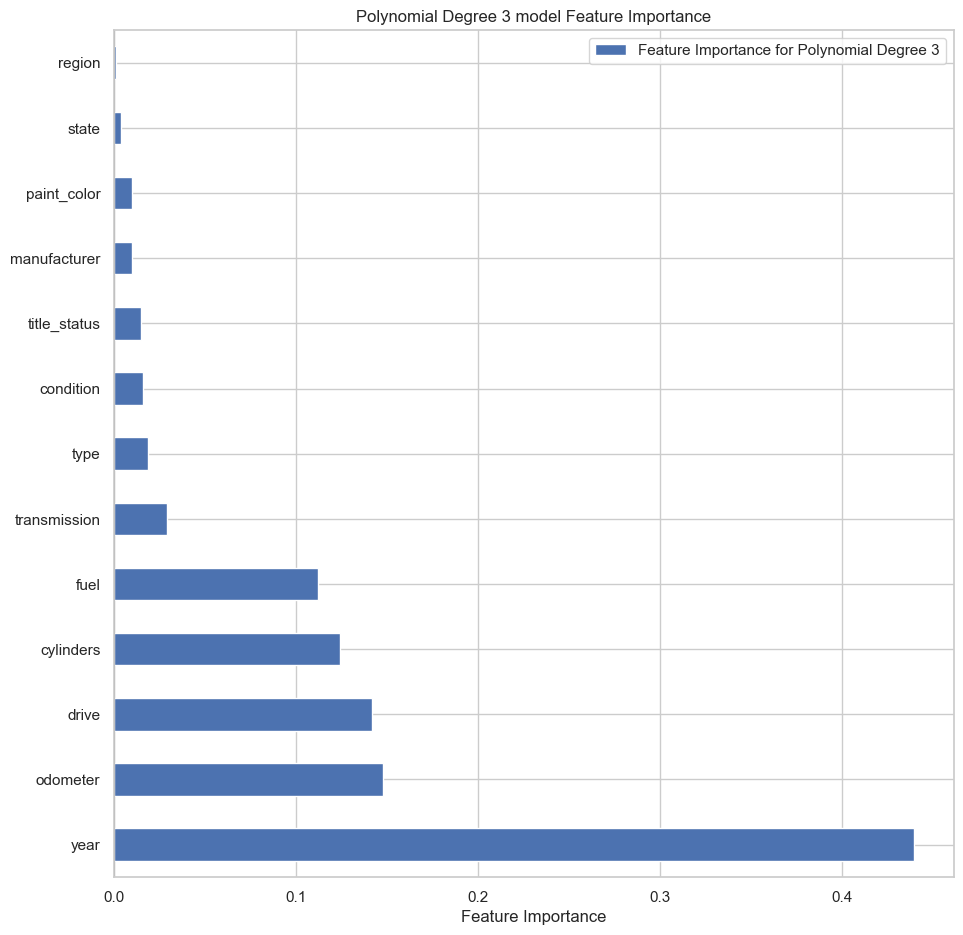

In [89]:
feature_importance_poly3.plot.barh(figsize=(14, 11))
plt.title("Polynomial Degree 3 model Feature Importance")
plt.axvline(x=0, color=".5")
plt.xlabel("Feature Importance")
plt.subplots_adjust(left=0.3)

Focusing on the six attributes identified can significantly optimize dealership inventory management. These attributes include the year of the vehicle, odometer reading, drive type, cylinder count, fuel type, and transmission type. By prioritizing these factors, dealerships can enhance their inventory selection strategies to potentially maximize profitability.

However, a notable limitation of this model is its failure to account for expected profit and inventory turnover impacts. To provide a more comprehensive optimization strategy, additional data on profitability metrics and inventory turnover rates would be essential. For example, while vehicles with larger engines generally command higher prices, stocking vehicles with excessively high cylinder counts might limit potential market demand, potentially resulting in lower profits and revenue. Conversely, incentivizing sales of high-cylinder count vehicles could balance this effect by boosting demand.

Therefore, future exploration should focus on incorporating data that addresses these profitability and inventory turnover considerations. Additionally, exploring alternative modeling techniques such as logarithmic transformations could potentially improve inference accuracy beyond the standard polynomial of degree 3 model currently used.